In [79]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

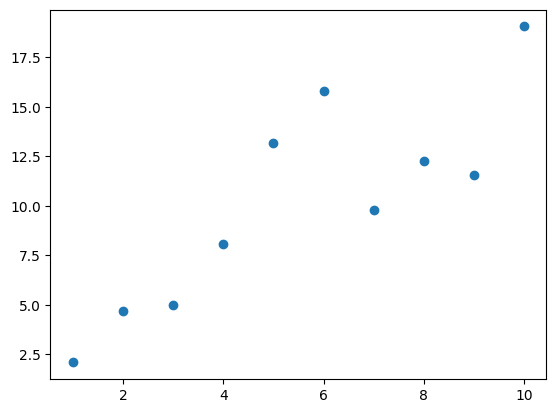

In [71]:
np.random.seed(3)
n = 10
x = np.arange(1, n+1)
noise = np.random.uniform(-.4, .4, size=n) + 1
y = x * 2 * noise

_ = plt.scatter(x, y)

In [77]:
X = np.array([x, y])
X.shape  # d * n

(2, 10)

(2, 10)

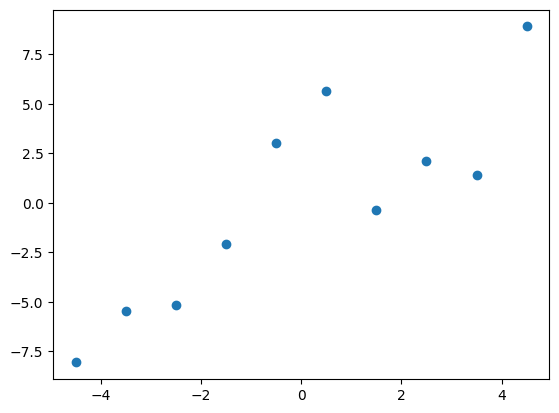

In [86]:
X = X - X.mean(axis=1, keepdims=True)
X.shape
_ = plt.scatter(*X)

# PCA using `C = XX'/n approach`

In [87]:
C = X @ X.T / n
C.shape

(2, 2)

In [141]:
eigenvalues, eigenvectors = np.linalg.eigh(C)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

eigenvalues
eigenvectors

array([31.6798,  1.8439])

array([[ 0.4634, -0.8862],
       [ 0.8862,  0.4634]])

# PCA using `K = X'X approach`

In [142]:
K = X.T @ X
K.shape

(10, 10)

In [152]:
lambdas, betas = np.linalg.eigh(K)
sorted_indices = np.argsort(lambdas)[::-1]
lambdas = lambdas[sorted_indices]
betas = betas[:, sorted_indices]

lambdas = lambdas[:min(X.shape)]
betas = betas[:, :min(X.shape)]

lambdas.shape
betas.shape

(2,)

(10, 2)

In [167]:
alphas = betas / np.sqrt(lambdas)
alphas.shape

(10, 2)

In [171]:
eigenvalues_ = lambdas / n
eigenvectors_ = X @ alphas

In [172]:
eigenvalues
eigenvalues_

eigenvectors
eigenvectors_

array([31.6798,  1.8439])

array([31.6798,  1.8439])

array([[ 0.4634, -0.8862],
       [ 0.8862,  0.4634]])

array([[ 0.4634,  0.8862],
       [ 0.8862, -0.4634]])

# Rest is same for both approaches

In [92]:
np.cumsum(eigenvalues) / sum(eigenvalues)

array([0.945, 1.   ])

In [131]:
k = 2
W = eigenvectors[:, :k]
W

array([[ 0.4634, -0.8862],
       [ 0.8862,  0.4634]])

In [132]:
coefficients = X.T @ W
coefficients.shape

(10, 2)

In [133]:
X_ = (coefficients @ W.T).T
np.sqrt(np.mean((X - X_) ** 2))  # rmse

np.float64(3.374329241674164e-16)

#### original vs reconstructed samples

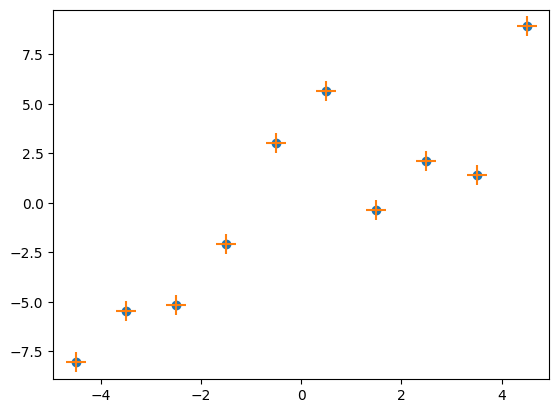

In [134]:
_ = plt.scatter(*X)
_ = plt.scatter(*X_, marker='+', s=200)

#### using coefficients with standard basic (not PCs)

In [135]:
W_sb = np.array([
    [1, 0],
    [0, 1]
]).T

W_sb = W_sb[:, :k]
W_sb

array([[1, 0],
       [0, 1]])

In [136]:
X_sb = (coefficients @ W_sb.T).T
np.sqrt(np.mean((X - X_sb) ** 2))  # rmse

np.float64(4.241452532060017)

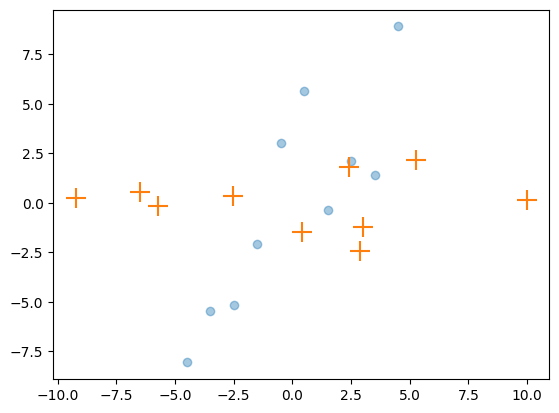

In [137]:
_ = plt.scatter(*X, alpha=0.4)
_ = plt.scatter(*X_sb, marker='+', s=200)

#### no need for X_sb (just enjoy coefficients)

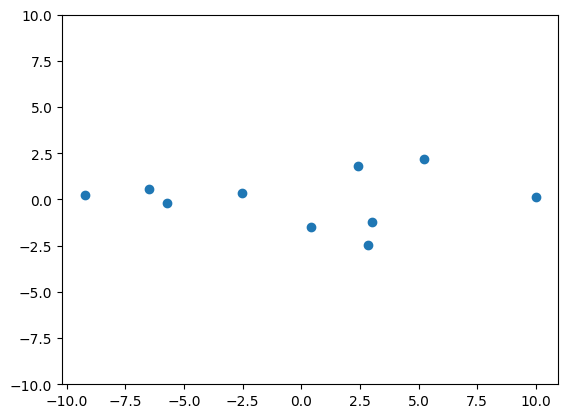

In [139]:
if k == 1:
  _ = plt.scatter(coefficients[:, 0], [0]*n)

if k == 2:
  _ = plt.scatter(*coefficients.T)
  _ = plt.ylim((-10, 10))